You should solve the MNIST problems and be able to recognize digit thanks to AI.

In [1]:
import torch
from torchvision import datasets, transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Transform each image into tensor ( numpy array => Tensor )
# Normalize data to win time in gradient descent
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# define batch size to regroup all images into slot of 64 images
batch_size = 64

# set train loader
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True, transform=transform), batch_size=batch_size)
# set test loader
test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False, download=True, transform=transform), batch_size=batch_size)

In [3]:
# set random weight for prediction
weight = torch.randn(784, 10, requires_grad=True)

In [8]:
def test(weights, test_loader):
    test_size = len(test_loader.dataset)
    correct = 0

    for batch_idx, (data, target) in enumerate(test_loader):
        # reshape each image, to follow generate activation value
        data = data.view((-1, 28*28))
        
        # generate activation value for each neuron
        outputs = torch.matmul(data, weights)
        
        # Transform value between 0 and 1
        softmax = F.softmax(outputs, dim=1)
        
        # Get the highest value / prediction
        pred = softmax.argmax(dim=1, keepdim=True)
        
        # calculate the number of good predictions to make an average
        n_correct = pred.eq(target.view_as(pred)).sum().item()
        correct += n_correct

    acc = correct / test_size # make average
    print(" Accuracy on test set", acc)
    return

In [9]:
# train AI

def train_ai(weight, train_loader):
    it = 0
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Reset my weight
        if weight.grad is not None:
            weight.grad.zero_()

        # reshape each image, to follow generate activation value
        data = data.view((-1, 28*28))
        
        # Get output of 10 neuron / prediction
        outputs = torch.matmul(data, weight)

        # Calculate loss
        log_softmax = F.log_softmax(outputs, dim=1)
        loss = F.nll_loss(log_softmax, targets)
        print("\rLoss shape: {}".format(loss), end="")

        # Backtracking, to minimize error
        loss.backward()

        with torch.no_grad():
            weight -= 0.1*weight.grad

        it += 1
        if it % 100 == 0:
            test(weight, test_loader)

        if it > 5000:
            break
            
train_ai(weight, train_loader)



Loss shape: 1.77189302444458452 Accuracy on test set 0.8537
Loss shape: 2.19386982917785646 Accuracy on test set 0.8594
Loss shape: 0.86868327856063845 Accuracy on test set 0.8653
Loss shape: 1.52300310134887755 Accuracy on test set 0.8651
Loss shape: 2.04420590400695867 Accuracy on test set 0.8656
Loss shape: 0.75222319364547734 Accuracy on test set 0.8635
Loss shape: 1.61993575096130377 Accuracy on test set 0.8656
Loss shape: 1.47390568256378175 Accuracy on test set 0.867
Loss shape: 0.77408719062805183 Accuracy on test set 0.8677
Loss shape: 0.807728052139282267

Le nombre est 9


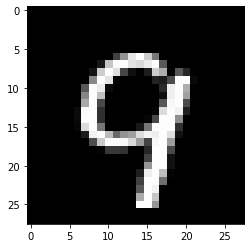

In [12]:
# Get test data
batch_idx, (data, target) = next(enumerate(test_loader))
data = data.view((-1, 28*28))

outputs = torch.matmul(data, weight)
softmax = F.softmax(outputs, dim=1)
pred = softmax.argmax(dim=1, keepdim=True)

plt.imshow(data[16].view(28, 28), cmap="gray")
print("Le nombre est", int(pred[16]))
plt.show()